<a href="https://colab.research.google.com/github/MaryamSatarnejad/8-queen/blob/main/Linear_Algebra_(Strang's_book).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

In [ ]:
import math
# Angle between two vectors function

def cosine(v, w):
  dot_product = v[0] * w[0] + v[1] * w[1]
  vectors_length_mlt = math.sqrt(v[0]**2 + v[1]**2) * math.sqrt(w[0]**2 + w[1]**2)
  cos_theta = dot_product / vectors_length_mlt
  radians = math.acos(cos_theta)
  degree = math.degrees(radians) # Convert radians to degrees
  return degree

v = [1, 0]
w = [0, 2]
print(cosine(v, w))

## 1.3

Difference matrix is used to calculate derivative for a function by value of 1 interval and descrete.It is reversible (det != 0).

In [ ]:
import sympy as sp

x1, x2, x3 = sp.symbols('x1 x2 x3')

A = sp.Matrix([
    [1, 0, 0],
    [-1, 1, 0],
    [0, -1, 1]
])

x = sp.Matrix([[x1],
               [x2],
               [x3]])
Ax = A * x

sp.pprint(Ax)

x_num = sp.Matrix([[1],
                   [4],
                   [9]])
Ax = A * x_num # b

sp.pprint(Ax)

A_inverse = sp.Matrix([[1, 0, 0],
                       [1, 1, 0],
                       [1, 1, 1]])
x = A_inverse * Ax
sp.pprint(x)

⎡   x₁   ⎤
⎢        ⎥
⎢-x₁ + x₂⎥
⎢        ⎥
⎣-x₂ + x₃⎦
⎡1⎤
⎢ ⎥
⎢3⎥
⎢ ⎥
⎣5⎦
⎡1⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣9⎦


In cyclic difference matrix, u, v, and w are dependant and for vector x given b there is either no solution or infinitely many solutions. By following u, v and w you will end up where you have started (origin). this matrix has no inverse (det=0).

In [ ]:
# Cyclic difference matrix
import numpy as np
C = np.array([[1, 0, -1],
               [-1, 1, 0],
               [0, -1, 1]])
x = np.array([[1],
               [2],
               [3]])
Cx = C.dot(x)
print(Cx)
print(np.linalg.det(C))

[[-2]
 [ 1]
 [ 1]]
0.0


Elimination matrix, eliminates the chosen element.




In [ ]:
import numpy as np
# Example
x = np.array([2, 3])
# To eliminate x[1] we will  have:
L = (x[1] / x[0])
E = np.array([[1, 0],
              [-L, 1]]) # Elimination matrix
x_eliminated = E.dot(x)
print(x_eliminated)

E_inverse = np.array([[1, 0],
                      [L, 1]])
x_original = E_inverse.dot(x_eliminated)
print(x_original)

[2. 0.]
[2. 3.]


Centered difference matrix. This matrix has better percition in calculating derivative.

In [ ]:
import numpy as np
CD_3in3 = np.array([[0, 1, 0],
                    [-1, 0, 1],
                    [0, -1, 0]])
print(np.linalg.det(CD_3in3))

x = np.array([1, 4, 9])
dot_product_3in3 = CD_3in3.dot(x)
print(dot_product_3in3/2) # /2 because the equation is: ((t+1)-(t-1))/2

CD_4in4 = np.array([[0, 1, 0, 0],
                    [-1, 0, 1, 0],
                    [0, -1, 0, 1],
                    [0, 0, -1, 0]])
print(np.linalg.det(CD_4in4))
x = np.array([1, 4, 9, 16])
dot_product_4in4 =CD_4in4.dot(x)
print(dot_product_4in4/2)


0.0
[ 2.  4. -2.]
1.0
[ 2.   4.   6.  -4.5]


# 2 Solving Linear Equations



## 2.1 Vectors and Linear Equations

In [ ]:
import numpy as np
# Rows view
A = np.array([[1, -2],
             [3, 2]])
b = np.array([1, 11])
intersection = np.linalg.solve(A, b)

# Columns view
col1 = np.array([1, 3])
col2 = np.array([-2, 2])
b = np.array([1, 11])
A = np.column_stack((col1, col2))
# print(A)
weights = np.linalg.solve(A, b)
x = weights[0]
y = weights[1]
print(f"\nSolution: x={x}, y={y}")


Solution: x=3.0, y=1.0


In [ ]:
# 3D space
import numpy as np
A = np.array([[1, 2, 3],
             [2, 5, 2],
             [6, -3, 1]])
b = np.array([6, 4, 2])
intersection_coordination = np.linalg.solve(A, b)
print(intersection_coordination)
''' Answer for x and y axes is so close to zero
but is not exactly zero because of rounding errors
accumulated during elimination algorithm.'''


[-1.48029737e-16 -1.48029737e-16  2.00000000e+00]


In [ ]:
# Markov matrix
import numpy as np
MM = np.array([[0.8, 0.3],
              [0.2, 0.7]])
u_0 = np.array([1, 0])
u_1 = MM.dot(u_0)
u_2 = MM.dot(u_1)
u_3 = MM.dot(u_2)
print(u_1, u_2, u_3)

[0.8 0.2] [0.7 0.3] [0.65 0.35]


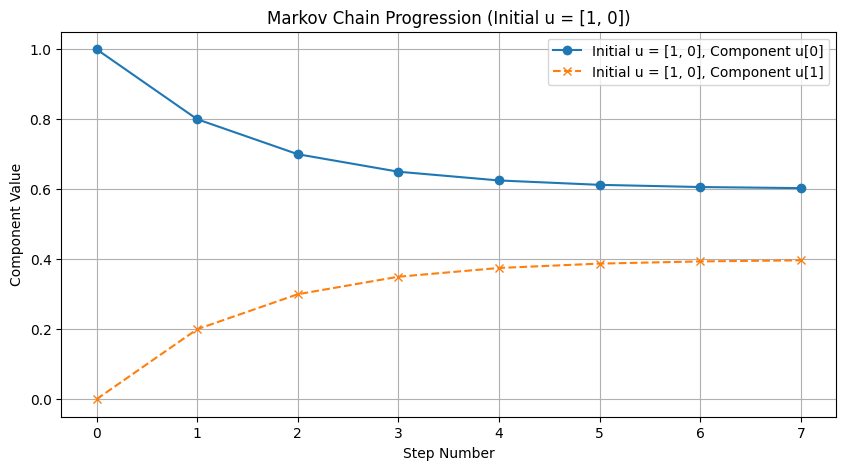

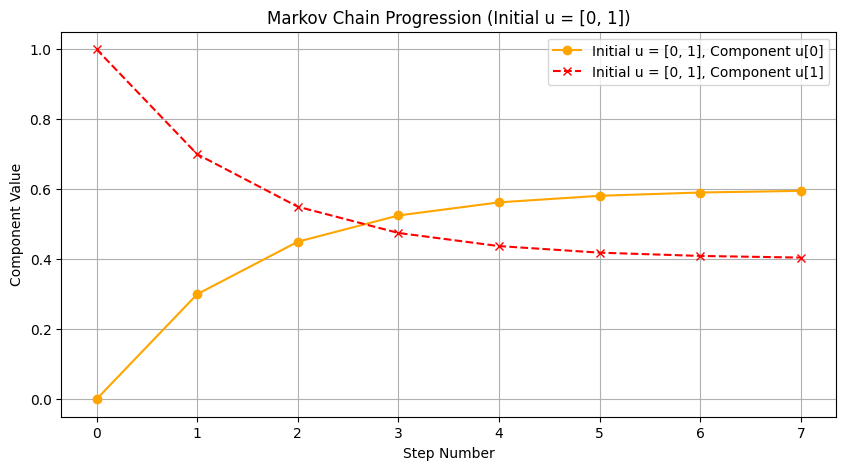

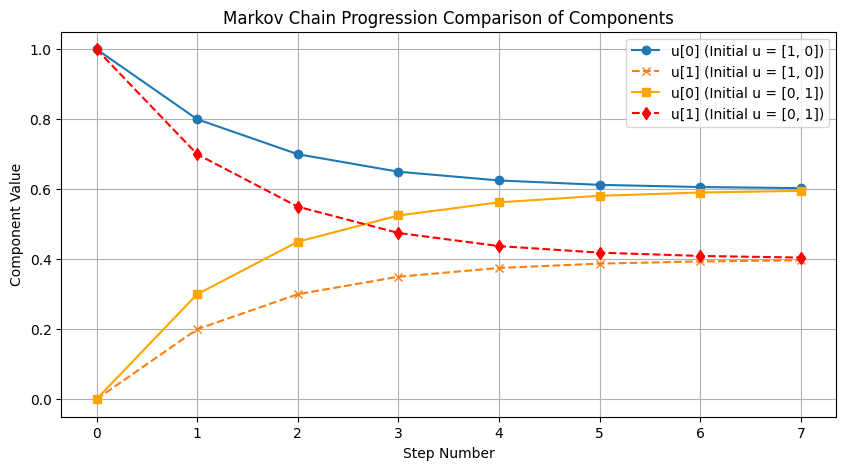

In [ ]:
# With help of AI
import numpy as np
import matplotlib.pyplot as plt

def Markov_Matrix(initial_u, steps):
  MM = np.array([[0.8, 0.3],
                [0.2, 0.7]])
  us=[initial_u]
  for _ in range(steps):
    us.append(MM.dot(us[-1]))
  return us

# First run with initial_u = [1, 0]
initial_u_1 = np.array([1, 0])
steps = 7
us_1 = Markov_Matrix(initial_u_1, steps)

# Extract components for plotting
steps_range = np.arange(steps + 1) # Represents step numbers 0 to 7
u0_values_1 = [u[0] for u in us_1]
u1_values_1 = [u[1] for u in us_1]

plt.figure(figsize=(10, 5))
plt.plot(steps_range, u0_values_1, marker='o', linestyle='-', label='Initial u = [1, 0], Component u[0]')
plt.plot(steps_range, u1_values_1, marker='x', linestyle='--', label='Initial u = [1, 0], Component u[1]')
plt.title('Markov Chain Progression (Initial u = [1, 0])')
plt.xlabel('Step Number')
plt.ylabel('Component Value')
plt.grid(True)
plt.legend()
plt.show()

# Second run with initial_u = [0, 1]
initial_u_2 = np.array([0, 1])
steps = 7
us_2 = Markov_Matrix(initial_u_2, steps)

# Extract components for plotting
u0_values_2 = [u[0] for u in us_2]
u1_values_2 = [u[1] for u in us_2]

plt.figure(figsize=(10, 5))
plt.plot(steps_range, u0_values_2, marker='o', linestyle='-', color='orange', label='Initial u = [0, 1], Component u[0]')
plt.plot(steps_range, u1_values_2, marker='x', linestyle='--', color='red', label='Initial u = [0, 1], Component u[1]')
plt.title('Markov Chain Progression (Initial u = [0, 1])')
plt.xlabel('Step Number')
plt.ylabel('Component Value')
plt.grid(True)
plt.legend()
plt.show()

# Plotting both on the same graph for comparison
plt.figure(figsize=(10, 5))
plt.plot(steps_range, u0_values_1, marker='o', linestyle='-', label='u[0] (Initial u = [1, 0])')
plt.plot(steps_range, u1_values_1, marker='x', linestyle='--', label='u[1] (Initial u = [1, 0])')
plt.plot(steps_range, u0_values_2, marker='s', linestyle='-', color='orange', label='u[0] (Initial u = [0, 1])')
plt.plot(steps_range, u1_values_2, marker='d', linestyle='--', color='red', label='u[1] (Initial u = [0, 1])')
plt.title('Markov Chain Progression Comparison of Components')
plt.xlabel('Step Number')
plt.ylabel('Component Value')
plt.grid(True)
plt.legend()
plt.show()

It seems that [0.6, 0.4] is eigenvector and when multiplying with markov matrix it results in the same initial vector.

In [ ]:
# Verifying:
MM = np.array([[0.8, 0.3],
              [0.2, 0.7]])
u = np.array([0.6, .4])
print(MM.dot(u))

[0.6 0.4]


## 2.3 Elimination Using Matrices


In [1]:
import numpy as np
A = np.array([[2, 4, -2],
              [4, 9, -3],
              [-2, -3, 7]])
l = -(A[1, 0] / A[0, 0])
E_21 = np.eye(3, 3)
E_21[1, 0] = l
print(E_21 @ (A))
A = E_21 @ (A)
E_31 = np.eye(3, 3)
E_31[2, 0] = -(A[2, 0] / A[0, 0])
print(E_31 @ A)
A = E_31 @ A
E_32 = np.eye(3, 3)
E_32[2, 1] = -(A[2, 1] / A[1, 1])
print(E_32 @ A)


'''
A = np.array([[2, 4, -2],
              [4, 9, -3],
              [-2, -3, 7]])
E = np.eye(3,3)
for i in range(1, A.shape[0]):
  for j in range(0, i-1):
    l=-(A[i, j] / A[j, j])
    print(l, i, j)
    E[i, j] = l
print(E)
'''

[[ 2.  4. -2.]
 [ 0.  1.  1.]
 [-2. -3.  7.]]
[[ 2.  4. -2.]
 [ 0.  1.  1.]
 [ 0.  1.  5.]]
[[ 2.  4. -2.]
 [ 0.  1.  1.]
 [ 0.  0.  4.]]


'\nA = np.array([[2, 4, -2],\n              [4, 9, -3],\n              [-2, -3, 7]])\nE = np.eye(3,3)\nfor i in range(1, A.shape[0]):\n  for j in range(0, i-1):\n    l=-(A[i, j] / A[j, j])\n    print(l, i, j)\n    E[i, j] = l\nprint(E)\n'